In [1]:
import pathlib
import matplotlib.pyplot as plt
import os
import shutil
from PIL import Image

In [ ]:
# shutil.rmtree("/kaggle/working")

In [2]:
base_dir = '/kaggle/working/data'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(os.path.join(train_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'labels'), exist_ok=True)

os.makedirs(os.path.join(val_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'labels'), exist_ok=True)

os.makedirs(os.path.join(test_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'labels'), exist_ok=True)



In [3]:
from tqdm import tqdm

def copy_files(src, dst):
    for filename in tqdm(os.listdir(src)):
        src_file = os.path.join(src, filename)
        dst_file = os.path.join(dst, filename)
        if os.path.isfile(src_file):
            shutil.copy(src_file, dst_file)
            
#         if len(dst) == length:
#             break


images_train_src = '/kaggle/input/military-equipment/Dataset military equipment/images_train'
labels_train_src = '/kaggle/input/military-equipment/Dataset military equipment/labels_train'

images_val_src = '/kaggle/input/military-equipment/Dataset military equipment/images_val'
labels_val_src = '/kaggle/input/military-equipment/Dataset military equipment/labels_val'


images_test_src = '/kaggle/input/military-equipment/Dataset military equipment/images_test'
labels_test_src = '/kaggle/input/military-equipment/Dataset military equipment/labels_test'



images_train_dst = os.path.join(train_dir, 'images')
labels_train_dst = os.path.join(train_dir, 'labels')

images_val_dst = os.path.join(val_dir, 'images')
labels_val_dst = os.path.join(val_dir, 'labels')

images_test_dst = os.path.join(test_dir, 'images')
labels_test_dst = os.path.join(test_dir, 'labels')

copy_files(images_train_src, images_train_dst)
copy_files(labels_train_src, labels_train_dst)

copy_files(images_val_src, images_val_dst)
copy_files(labels_val_src, labels_val_dst)

copy_files(images_test_src, images_test_dst)
copy_files(labels_test_src, labels_test_dst)


100%|██████████| 3361/3361 [00:11<00:00, 297.10it/s]


In [ ]:
dataset_path = "/kaggle/working/data"

target_numbers = ("3", "4", "5", "6", "7", "8", "9", "10", "11")


image_extensions = [".jpg", ".png", ".jpeg"]

for split in ["train", "test", "val"]:
    labels_path = os.path.join(dataset_path, split, "labels")
    images_path = os.path.join(dataset_path, split, "images")
    
    if not os.path.exists(labels_path) or not os.path.exists(images_path):
        print(f"One of directories {labels_path} or {images_path} is not defined.")
        continue

    for label_file in os.listdir(labels_path):
        if label_file.endswith(".txt"):
            label_file_path = os.path.join(labels_path, label_file)

            with open(label_file_path, "r") as file:
                first_line = file.readline().strip()
                
                if first_line.startswith(target_numbers):
                    os.remove(label_file_path)
                    print(f"Deleted label file: {label_file_path}")
                    image_name = os.path.splitext(label_file)[0]
                    image_deleted = False
                    
                    for ext in image_extensions:
                        image_file_path = os.path.join(images_path, image_name + ext)
                        if os.path.exists(image_file_path):
                            os.remove(image_file_path)
                            print(f"Deleted image file: {image_file_path}")
                            image_deleted = True
                            break  
                            
                    if not image_deleted:
                        print(f"No corresponding image found for label: {label_file_path}")


In [24]:
# import os
# from tqdm import tqdm


# dataset_path = "/kaggle/working/data"

# for split in tqdm(["train", "test", "val"]):
#     images_path = os.path.join(dataset_path, split, "images")
#     labels_path = os.path.join(dataset_path, split, "labels")

#     if not os.path.exists(images_path) or not os.path.exists(labels_path):
#         print(f"Одна из директорий {images_path} или {labels_path} не найдена, пропускаем.")
#         continue

#     for image_file in os.listdir(images_path):
#         if image_file.endswith(".jpg", "png"): 
#             label_file = os.path.splitext(image_file)[0] + ".txt"
#             label_file_path = os.path.join(labels_path, label_file)

#             image_file_path = os.path.join(images_path, image_file)
#             if not os.path.exists(label_file_path):
#                 os.remove(image_file_path)
#                 print(f"Удален файл изображения без метки: {image_file_path}")


100%|██████████| 3/3 [00:00<00:00, 80.16it/s]


In [3]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
device

'cuda'

In [9]:
train_im_data_dir = "/kaggle/working/data/train/images"
train_lbl_data_dir = "/kaggle/working/data/train/labels"

total_train_images = os.listdir(train_im_data_dir)
total_train_labels = os.listdir(train_lbl_data_dir)
len(total_train_images), len(total_train_labels)

(3181, 3181)

In [10]:
train_im_data_dir = "/kaggle/working/data/val/images"
train_lbl_data_dir = "/kaggle/working/data/val/labels"

total_val_images = os.listdir(train_im_data_dir)
total_val_labels = os.listdir(train_lbl_data_dir)
len(total_val_images), len(total_val_labels)

(449, 449)

In [11]:
train_im_data_dir = "/kaggle/working/data/test/images"
train_lbl_data_dir = "/kaggle/working/data/test/labels"

total_test_images = os.listdir(train_im_data_dir)
total_test_labels = os.listdir(train_lbl_data_dir)
len(total_test_images), len(total_test_labels)

(889, 889)

In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def output(limit, imgs, labales, set, axis="on", draw=False, info = False):
    classes = ["tank", "ifv", "apc"]
    num = 0
    limit = limit
    for img_name, label in zip(sorted(imgs), sorted(labales)):
        num += 1

        label_path = os.path.join(f"/kaggle/working/data/{set}/labels", label)
        img_path = os.path.join(f"/kaggle/working/data/{set}/images", img_name)
        
        img = Image.open(img_path)
        img_width, img_height = img.size  
        img = np.array(img)

        with open(label_path, "r") as file:
            for line in file:
                data = line.split()
                
                class_id = int(data[0])  
                x_center = float(data[1]) * img_width
                y_center = float(data[2]) * img_height
                width = float(data[3]) * img_width
                height = float(data[4]) * img_height


                x_min = int(x_center - width / 2)
                y_min = int(y_center - height / 2)
                x_max = int(x_center + width / 2)
                y_max = int(y_center + height / 2)

                if info == True:

                    print(f""" 
                        
                        YOLO data:
                        
                        Class ID: {class_id}, 
                        X canter: {x_center}, 
                        Y center: {y_center}, 
                        Box width: {width}, 
                        Box height: {height}


                        --- Transformation ---
                        YOLO -> Box coordinates
        
    
                        Box coordinates:
                        
                        X min: {x_min}, 
                        Y min: {y_min}, 
                        X max: {x_max}, 
                        Y max: {y_max}
                        
                        """)

                

                if draw == True:
                    cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 0, 0), 2)
                    cv2.putText(img, classes[class_id].upper(), (int(x_min), int(y_min) - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 0, 0), 3, cv2.LINE_AA)

        if axis == "off":
            plt.axis("off")

        plt.imshow(img)
        plt.show()

        if num >= limit:
            break


In [17]:
sorted(total_train_images)[:5], sorted(total_train_labels)[:5]

(['00000795.png',
  '00000796.png',
  '00000797.png',
  '00000798.png',
  '00000799.png'],
 ['00000795.txt',
  '00000796.txt',
  '00000797.txt',
  '00000798.txt',
  '00000799.txt'])

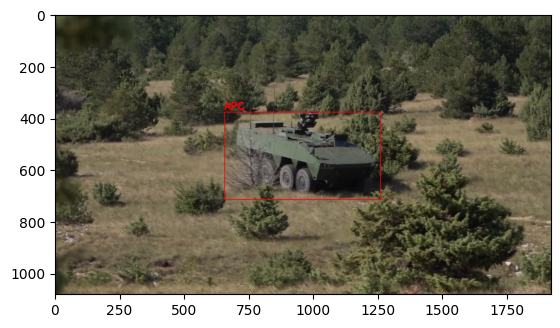

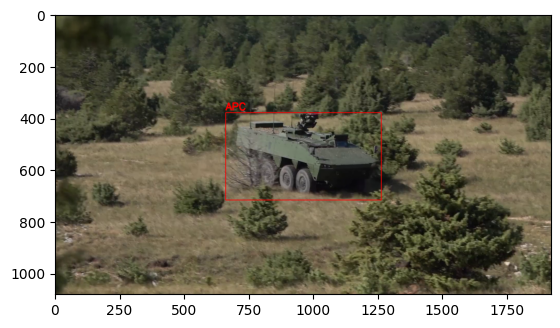

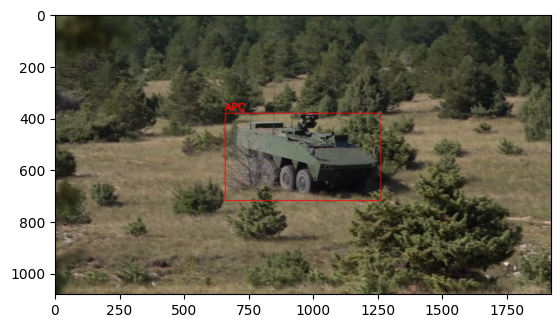

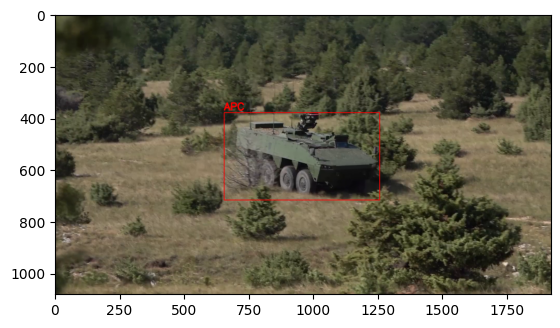

In [21]:
output(4, total_train_images, total_train_labels, "train", axis="on", draw=True, info = False)

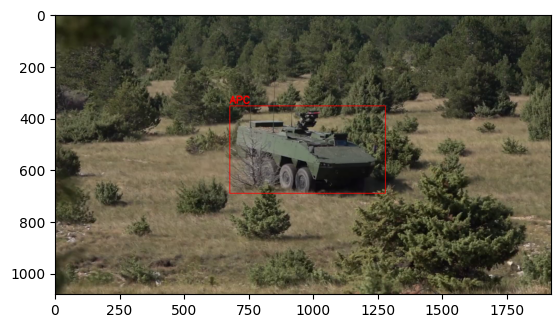

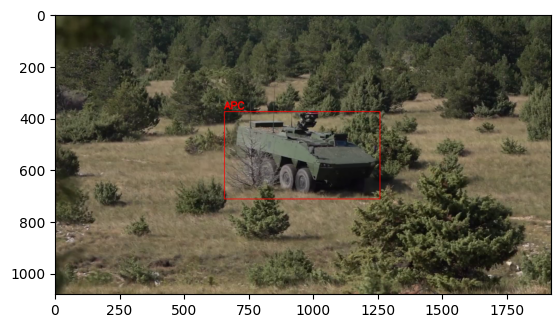

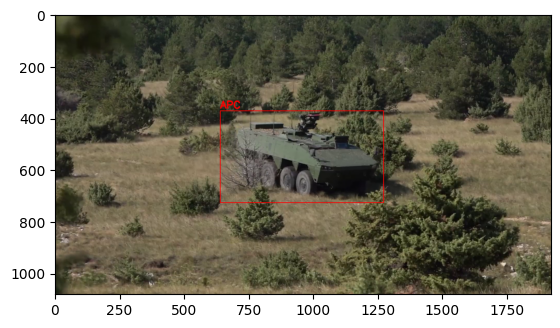

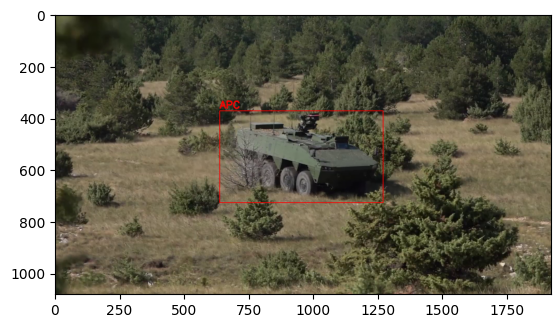

In [24]:
output(4, total_test_images, total_test_labels, "test", axis="on", draw=True, info = False)

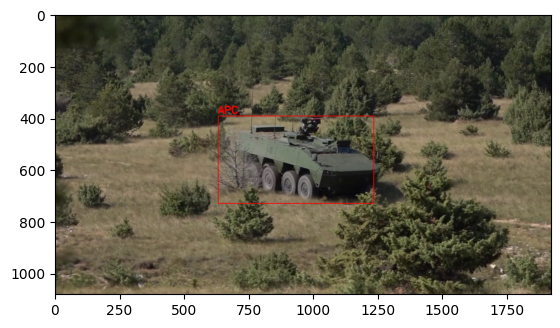

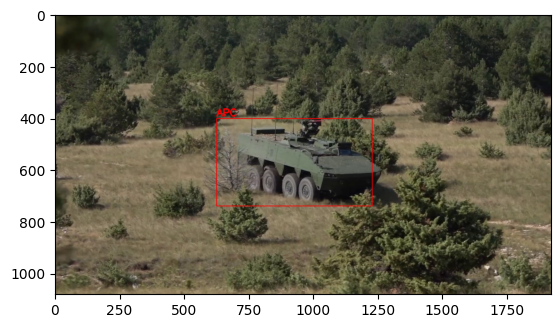

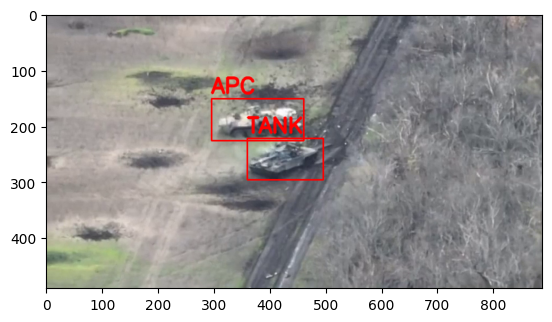

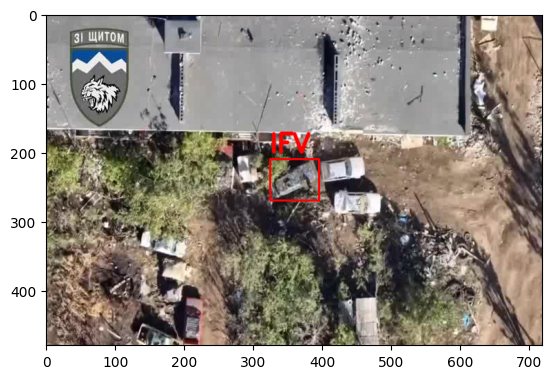

In [26]:
output(4, total_val_images, total_val_labels, "val", axis="on", draw=True, info = False)

In [2]:
!pip install --upgrade torch torchvision ultralytics torchaudio


In [3]:
!pip install --upgrade torch torchvision --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 838.3/838.3 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 70.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 87.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 9.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 28.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 12.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [18]:
# from ultralytics import YOLO
# model = YOLO("/kaggle/input/pretrained-model-2/best (10).pt")
# names = model.names
# names

In [12]:
from ultralytics import YOLO
import torch

model = YOLO("yolov10b.pt")

results = model.train(data="/kaggle/input/abs-fin-yaml/abs_fin_data.yaml", epochs=70, imgsz=736, augment=True, device=device, workers=4, batch=8)


Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.5.1+cu118 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov10b.pt, data=/kaggle/input/abs-fin-yaml/abs_fin_data.yaml, epochs=70, time=None, patience=100, batch=8, imgsz=736, save=True, save_period=-1, cache=False, device=cuda, workers=4, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

train: Scanning /kaggle/working/data/train/labels.cache... 3181 images, 0 backgrounds, 209 corrupt: 100%|██████████| 3181/3181 [00:00<?, ?it/s]

train: WARNING ⚠️ /kaggle/working/data/train/images/1642.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0208]
train: WARNING ⚠️ /kaggle/working/data/train/images/18d77dd0-6b7b-40f2-8522-375316738fbb.png: ignoring corrupt image/label: Label class 9 exceeds dataset class count 3. Possible class labels are 0-2
train: WARNING ⚠️ /kaggle/working/data/train/images/21375.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0008]
train: WARNING ⚠️ /kaggle/working/data/train/images/21376.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0008]
train: WARNING ⚠️ /kaggle/working/data/train/images/21388.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0031]
train: WARNING ⚠️ /kaggle/working/data/train/images/21389.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0031]
train: WARNING ⚠️ /kaggle/working/data/train/im


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/data/val/labels.cache... 449 images, 0 backgrounds, 26 corrupt: 100%|██████████| 449/449 [00:00<?, ?it/s]

val: WARNING ⚠️ /kaggle/working/data/val/images/21530.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0117]
val: WARNING ⚠️ /kaggle/working/data/val/images/21535.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0133]
val: WARNING ⚠️ /kaggle/working/data/val/images/21585.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.007]
val: WARNING ⚠️ /kaggle/working/data/val/images/21592.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0066]
val: WARNING ⚠️ /kaggle/working/data/val/images/21594.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0074]
val: WARNING ⚠️ /kaggle/working/data/val/images/21597.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0066]
val: WARNING ⚠️ /kaggle/working/data/val/images/21611.jpg: ignoring corrupt image/label: non-normalized or out of boun

Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 135 weight(decay=0.0), 148 weight(decay=0.0005), 147 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 736 train, 736 val
Using 4 dataloader workers
Logging results to runs/detect/train4
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      14.4G      3.484      3.588      2.783         37        736: 100%|██████████| 372/372 [03:53<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.12it/s]


                   all        423       1650      0.629      0.687      0.709      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      8.98G      3.203      2.139      2.661         22        736: 100%|██████████| 372/372 [03:49<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.12it/s]

                   all        423       1650      0.842      0.677      0.779      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      9.01G          3       1.85      2.565         12        736: 100%|██████████| 372/372 [03:47<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.10it/s]

                   all        423       1650      0.826      0.741      0.839      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      9.05G      2.795      1.648      2.471         32        736: 100%|██████████| 372/372 [03:47<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.11it/s]

                   all        423       1650      0.922      0.891      0.943       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      9.05G      2.577      1.442      2.345         20        736: 100%|██████████| 372/372 [03:47<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.13it/s]

                   all        423       1650      0.925      0.888       0.94      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      9.02G      2.456      1.338      2.301         32        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.12it/s]

                   all        423       1650      0.925      0.904      0.959       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      9.07G      2.299      1.222       2.21         26        736: 100%|██████████| 372/372 [03:46<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.16it/s]

                   all        423       1650      0.935      0.921      0.967        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      9.03G      2.242       1.17      2.173         55        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.15it/s]

                   all        423       1650      0.935      0.927      0.967      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      9.04G      2.132      1.102      2.137         23        736: 100%|██████████| 372/372 [03:46<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.14it/s]

                   all        423       1650      0.945      0.937      0.979      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      9.05G      2.083      1.066      2.116         38        736: 100%|██████████| 372/372 [03:46<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.15it/s]

                   all        423       1650      0.955      0.945      0.979      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      9.09G      2.017      1.021      2.081         25        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.16it/s]

                   all        423       1650      0.957      0.933      0.979      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      9.02G      1.953     0.9886      2.049         16        736: 100%|██████████| 372/372 [03:46<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.16it/s]

                   all        423       1650      0.953      0.947      0.979      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      9.06G      1.918     0.9536      2.044         22        736: 100%|██████████| 372/372 [03:46<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.15it/s]

                   all        423       1650      0.959      0.942      0.983      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      9.06G      1.878     0.9351       2.03         17        736: 100%|██████████| 372/372 [03:46<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.15it/s]

                   all        423       1650      0.958      0.953      0.981      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      9.02G      1.859     0.9189      2.022         44        736: 100%|██████████| 372/372 [03:46<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.14it/s]

                   all        423       1650      0.953      0.957      0.987      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      9.03G      1.813     0.9049      2.002         33        736: 100%|██████████| 372/372 [03:46<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.17it/s]

                   all        423       1650      0.951      0.942      0.982      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      9.05G      1.733     0.8347       1.96         25        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.12it/s]

                   all        423       1650      0.958      0.955      0.987      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      9.03G      1.718     0.8305      1.959         42        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.15it/s]

                   all        423       1650      0.964      0.958      0.986       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      9.03G      1.695     0.8124      1.949         52        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.13it/s]

                   all        423       1650      0.972      0.963       0.99      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      9.05G      1.683     0.8064      1.946         30        736: 100%|██████████| 372/372 [03:46<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.15it/s]

                   all        423       1650       0.97      0.952      0.988      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      9.04G      1.683     0.8153       1.95         34        736: 100%|██████████| 372/372 [03:46<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.14it/s]

                   all        423       1650      0.974      0.947       0.99       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      9.02G      1.653     0.7897      1.933         43        736: 100%|██████████| 372/372 [03:46<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.15it/s]

                   all        423       1650      0.971      0.963      0.988      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      9.06G      1.616     0.7664      1.928         18        736: 100%|██████████| 372/372 [03:46<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.16it/s]

                   all        423       1650      0.974      0.966       0.99      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      9.03G      1.597      0.762      1.909         33        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.14it/s]

                   all        423       1650      0.978      0.955      0.991      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      9.03G      1.556     0.7344      1.894         35        736: 100%|██████████| 372/372 [03:47<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.13it/s]

                   all        423       1650      0.964      0.956       0.99      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      9.03G       1.57     0.7374        1.9         24        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.14it/s]

                   all        423       1650      0.984       0.97      0.993       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      9.03G      1.564     0.7318      1.896         33        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.14it/s]

                   all        423       1650      0.963      0.972      0.991      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      9.05G      1.515     0.7117      1.878         24        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.13it/s]

                   all        423       1650      0.979      0.963      0.991      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      9.06G      1.501     0.6989      1.873         36        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.14it/s]

                   all        423       1650      0.984      0.973      0.993      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      9.02G      1.501     0.7018      1.874         24        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.12it/s]

                   all        423       1650      0.968      0.973      0.991      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      9.04G      1.453     0.6796      1.855         26        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.14it/s]

                   all        423       1650      0.979      0.972      0.992      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      9.05G       1.47     0.6818      1.872         46        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.15it/s]

                   all        423       1650      0.979      0.971      0.992      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      9.09G       1.45     0.6747      1.853         19        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.14it/s]

                   all        423       1650      0.975      0.961      0.992      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      9.03G       1.44     0.6673      1.844         40        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.16it/s]

                   all        423       1650      0.971       0.97      0.992      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      9.06G      1.403     0.6582      1.837         56        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.10it/s]

                   all        423       1650      0.983      0.974      0.993      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      9.06G      1.418      0.651      1.842         21        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.10it/s]

                   all        423       1650      0.981      0.974      0.993      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      9.03G      1.388     0.6442      1.823         22        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]

                   all        423       1650      0.976       0.97      0.993       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      9.01G      1.385     0.6405       1.83         40        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.05it/s]

                   all        423       1650      0.975      0.977      0.993      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      9.06G       1.37     0.6371      1.821         47        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.09it/s]

                   all        423       1650      0.981      0.973      0.993      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      9.04G      1.355     0.6226      1.822         49        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]

                   all        423       1650      0.978      0.973      0.993      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      9.03G      1.349     0.6086      1.816          9        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.09it/s]

                   all        423       1650      0.975      0.976      0.993      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      9.07G      1.342     0.6093      1.808         29        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]

                   all        423       1650      0.982      0.968      0.993      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70       9.1G      1.317      0.602      1.804         34        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.05it/s]

                   all        423       1650      0.973      0.975      0.993      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      9.06G      1.308     0.5935      1.796         23        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]

                   all        423       1650      0.977      0.974      0.993      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      9.06G      1.296     0.5889      1.801         43        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.09it/s]

                   all        423       1650      0.979      0.967      0.993      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      9.05G      1.304     0.5924      1.802         32        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]

                   all        423       1650      0.985      0.975      0.994      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      9.03G      1.269     0.5709      1.779         19        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.09it/s]

                   all        423       1650      0.988      0.973      0.993      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      9.09G      1.242     0.5662      1.773         83        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]

                   all        423       1650      0.981      0.977      0.994      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      9.05G      1.267      0.572      1.777         28        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]

                   all        423       1650      0.982      0.987      0.994      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      9.04G      1.261      0.563      1.786         30        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.07it/s]

                   all        423       1650       0.98      0.978      0.993      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      9.06G      1.231     0.5502      1.771         35        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.09it/s]

                   all        423       1650      0.984      0.984      0.994      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      9.09G      1.214     0.5469       1.77         15        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]

                   all        423       1650      0.989      0.979      0.994      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      9.03G      1.201     0.5361       1.76         41        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]

                   all        423       1650      0.986      0.983      0.994      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      9.03G        1.2     0.5336      1.762         21        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]

                   all        423       1650      0.989      0.981      0.994      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      9.04G      1.177     0.5274      1.759         40        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.09it/s]

                   all        423       1650      0.985      0.979      0.994      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70       9.1G       1.18     0.5248      1.757         22        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.11it/s]

                   all        423       1650      0.986      0.977      0.994      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      9.03G      1.162     0.5142      1.755         32        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.07it/s]

                   all        423       1650      0.984      0.982      0.994      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      9.05G      1.148     0.5128      1.752         23        736: 100%|██████████| 372/372 [03:48<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]

                   all        423       1650      0.984      0.986      0.994      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      9.06G      1.142     0.5017      1.744         30        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.07it/s]

                   all        423       1650      0.988      0.985      0.994      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      9.03G      1.131     0.4991      1.735         24        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]

                   all        423       1650      0.986       0.98      0.994      0.897


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      9.02G      1.105     0.4577      1.739         10        736: 100%|██████████| 372/372 [03:48<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]

                   all        423       1650      0.984      0.977      0.994      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      9.03G      1.078     0.4503      1.714          9        736: 100%|██████████| 372/372 [03:47<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.09it/s]

                   all        423       1650      0.989      0.978      0.994      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      9.01G       1.07     0.4525      1.709         14        736: 100%|██████████| 372/372 [03:47<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.07it/s]

                   all        423       1650      0.985      0.981      0.994      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      9.03G      1.065     0.4442      1.716         28        736: 100%|██████████| 372/372 [03:47<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.09it/s]

                   all        423       1650      0.978      0.981      0.994        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      9.02G      1.046     0.4357      1.707         25        736: 100%|██████████| 372/372 [03:47<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.06it/s]

                   all        423       1650      0.993      0.974      0.994      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      9.01G      1.032     0.4253      1.701          9        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.13it/s]

                   all        423       1650      0.987      0.984      0.994      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      9.05G      1.015     0.4238      1.695          6        736: 100%|██████████| 372/372 [03:46<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.01it/s]

                   all        423       1650      0.986      0.983      0.994      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      9.03G     0.9998      0.418      1.701          9        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.09it/s]

                   all        423       1650      0.988      0.987      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      9.03G     0.9896     0.4136      1.689          8        736: 100%|██████████| 372/372 [03:47<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.14it/s]

                   all        423       1650      0.987      0.985      0.994      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      9.01G     0.9803     0.4074       1.68         20        736: 100%|██████████| 372/372 [03:46<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.14it/s]

                   all        423       1650      0.988      0.985      0.995       0.91



70 epochs completed in 4.602 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 41.4MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 41.4MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.5.1+cu118 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv10b summary (fused): 383 layers, 20,415,778 parameters, 0 gradients, 97.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/27 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   4%|▎         | 1/27 [00:00<00:06,  3.90it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 2/27 [00:00<00:07,  3.50it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  11%|█         | 3/27 [00:01<00:08,  2.77it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  15%|█▍        | 4/27 [00:01<00:07,  3.10it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  19%|█▊        | 5/27 [00:01<00:06,  3.39it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  22%|██▏       | 6/27 [00:01<00:05,  3.64it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  26%|██▌       | 7/27 [00:01<00:05,  3.81it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  30%|██▉       | 8/27 [00:02<00:04,  3.96it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 9/27 [00:02<00:04,  4.07it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  37%|███▋      | 10/27 [00:02<00:04,  4.12it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  41%|████      | 11/27 [00:02<00:03,  4.12it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  44%|████▍     | 12/27 [00:03<00:03,  4.13it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  48%|████▊     | 13/27 [00:03<00:03,  4.16it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  52%|█████▏    | 14/27 [00:03<00:03,  4.14it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  56%|█████▌    | 15/27 [00:03<00:02,  4.12it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  59%|█████▉    | 16/27 [00:04<00:02,  4.09it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  63%|██████▎   | 17/27 [00:04<00:02,  4.10it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 18/27 [00:04<00:02,  4.13it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  70%|███████   | 19/27 [00:04<00:01,  4.15it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  74%|███████▍  | 20/27 [00:05<00:01,  4.15it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  78%|███████▊  | 21/27 [00:05<00:01,  4.08it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  81%|████████▏ | 22/27 [00:05<00:01,  4.13it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  85%|████████▌ | 23/27 [00:05<00:00,  4.14it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  89%|████████▉ | 24/27 [00:06<00:00,  4.16it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 25/27 [00:06<00:00,  4.14it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  96%|█████████▋| 26/27 [00:06<00:00,  4.02it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.02it/s]


                   all        423       1650       0.99      0.984      0.995       0.91
                  TANK        277        652      0.993      0.986      0.995      0.904
                   IFV        117        229      0.987       0.98      0.994      0.919
                   APC        177        769       0.99      0.985      0.995      0.907
Speed: 0.1ms preprocess, 12.0ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train4


In [5]:
# box_loss - how accurate model in box drawing  
# cls_loss - how accurate model in classification
# dfl_loss - distribution-focal loss - how well model is if it concentrate on difficult cases

# box.map - how accurate in class/coordinate prediction
# box.map50 - average accuracy if threshold is more than 50 
# box.maps - average accuracy with different thresholds 

In [13]:
 from ultralytics import YOLO


model = YOLO("/kaggle/working/runs/detect/train4/weights/best.pt") 


metrics = model.val(data='/kaggle/input/abs-fin-yaml/abs_fin_data.yaml') 
metrics.box.map  
metrics.box.map50  
metrics.box.maps 

Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.5.1+cu118 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv10b summary (fused): 383 layers, 20,415,778 parameters, 0 gradients, 97.9 GFLOPs


val: Scanning /kaggle/working/data/val/labels.cache... 449 images, 0 backgrounds, 26 corrupt: 100%|██████████| 449/449 [00:00<?, ?it/s]

val: WARNING ⚠️ /kaggle/working/data/val/images/21530.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0117]
val: WARNING ⚠️ /kaggle/working/data/val/images/21535.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0133]
val: WARNING ⚠️ /kaggle/working/data/val/images/21585.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.007]
val: WARNING ⚠️ /kaggle/working/data/val/images/21592.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0066]
val: WARNING ⚠️ /kaggle/working/data/val/images/21594.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0074]
val: WARNING ⚠️ /kaggle/working/data/val/images/21597.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0066]
val: WARNING ⚠️ /kaggle/working/data/val/images/21611.jpg: ignoring corrupt image/label: non-normalized or out of boun


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.68it/s]


                   all        423       1650       0.99      0.984      0.995       0.91
                  TANK        277        652      0.994      0.986      0.995      0.904
                   IFV        117        229      0.987      0.979      0.994      0.916
                   APC        177        769       0.99      0.987      0.995       0.91
Speed: 0.2ms preprocess, 13.0ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/val


array([    0.90443,     0.91586,     0.90997])

In [ ]:
# Precision example:

# We've got 100 images and a "car" class. 80 of those images contains cars and they were classified
# correctly as cars. 20 of those images dont contain cars, but were classified as ones, so 
# Precision will be: 80 / (80 + 20) = 0.8 (80% )